## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Checking the number of mice.   查看老鼠數量 
## 以編號來說是這個
print(len(mouse_metadata['Mouse ID'].unique()))

249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.   找出在Timepoint有重複出現的老鼠id
# 分群，並紀錄出現次數
mouseTimepointGroup = study_results.groupby(['Mouse ID', 'Timepoint']).size().reset_index(name = 'count')
# 查詢出現超過1次的清單
duplicateMouseList = mouseTimepointGroup.query('count > 1')
# 取出重複的 Mouse ID 列表
duplicateMouseIdList = duplicateMouseList['Mouse ID'].unique()
print(duplicateMouseIdList)

['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 找出被重複過的老鼠的所有資料(不一定要做)
# 查詢重複的 Mouse ID 列表的詳細資料
mouseData = mouse_metadata[mouse_metadata['Mouse ID'].isin(duplicateMouseIdList)]
print(mouseData)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
107     g989     Propriva  Female          21          26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.  依據老鼠的id 把被重複過的老鼠刪掉  創一個新的data frame
# 查詢"不在"重複的 Mouse ID 列表的老鼠
cleanDataFrame = mouse_metadata[~mouse_metadata['Mouse ID'].isin(duplicateMouseIdList)]
print(cleanDataFrame)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[248 rows x 5 columns]


In [7]:
# Checking the number of mice in the clean DataFrame.  查看在新的dataframe裡老鼠的數量
# 數量
print(len(cleanDataFrame['Mouse ID'].unique()))

248


In [8]:
#?這步驟原本在第一欄  放到這裡可以嗎
## Combine the data into a single dataset    
data = pd.merge(cleanDataFrame, study_results, on ="Mouse ID", how ="inner")
# Display the data table for preview
print(data)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1875     z969     Naftisol  Male           9          30         25   
1876     z969     Naftisol  Male           9          30         30   
1877     z969     Naftisol  Male           9          30         35   
1878     z969     Naftisol  Male           9          30         40   
1879     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 用groupby & summary的方法求出每種藥下面的值
# mean, median, variance, standard deviation, and SEM of the tumor volume.   
# Assemble the resulting series into a single summary dataframe. 用心求得的結果創一個新的dataframe

group_data = data.groupby(['Drug Regimen'])

mean = group_data["Tumor Volume (mm3)"].mean()
median = group_data["Tumor Volume (mm3)"].median()
variance = group_data["Tumor Volume (mm3)"].var()
stdeviation = group_data["Tumor Volume (mm3)"].std()
SEM = group_data["Tumor Volume (mm3)"].sem()

summary = pd.DataFrame({ "Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdeviation, "SEM": SEM})
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line 用一條公式寫出跟上面一樣的答案
# 使用匯總方法，在一行中產生相同的摘要統計信息
summary = group_data["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

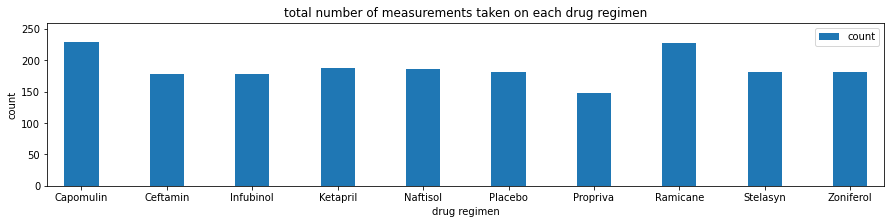

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas

## 生成bar圖，顯示在每種藥物方案上進行的測量總數

drugRegimenTestCounts = data.groupby(['Drug Regimen']).size().reset_index(name = 'count')

df = pd.DataFrame({'lab': drugRegimenTestCounts['Drug Regimen'], 'count': drugRegimenTestCounts['count']})
ax = df.plot(kind='bar', figsize=(15, 3), title='total number of measurements taken on each drug regimen', 
             x='lab', y='count', rot=0, width=0.4)
ax.set_xlabel("drug regimen");
ax.set_ylabel("count");
plt.xlim(-0.4,len(drugRegimenTestCounts['Drug Regimen'])-0.6)     
plt.ylim(0,max(drugRegimenTestCounts['count'])+30)
plt.show()
plt.tight_layout()

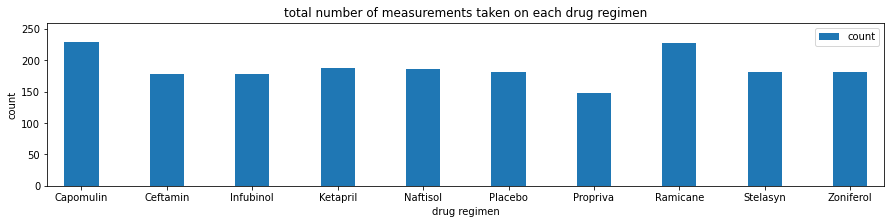

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#用pyplot方法創bar圖表顯示每個藥品的總測量  要求得跟上面一樣的圖


plt.figure(figsize = (15, 3))
plt.title("total number of measurements taken on each drug regimen")  
plt.xlabel("drug regimen")  
plt.ylabel("count")  
plt.bar(drugRegimenTestCounts['Drug Regimen'], drugRegimenTestCounts['count'], width = 0.4) 
plt.legend(['count'])
plt.xlim(-0.4,len(drugRegimenTestCounts['Drug Regimen'])-0.6)     
plt.ylim(0,max(drugRegimenTestCounts['count'])+30)
plt.show()
plt.tight_layout()




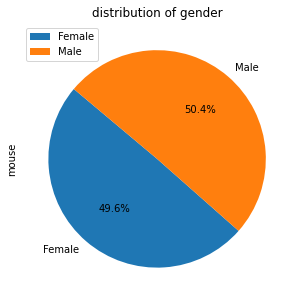

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas  用pandas的方法創pie圖表顯示男的跟女的老鼠的分布

mouseSex = cleanDataFrame.groupby(['Sex']).size().reset_index(name = 'count')
ax = mouseSex.plot(kind='pie', y='count', figsize=(5, 5), labels = mouseSex['Sex'], autopct="%1.1f%%", startangle= 140, title='distribution of gender')
ax.set_ylabel('mouse');
ax.legend(mouseSex['Sex'], loc="upper left")



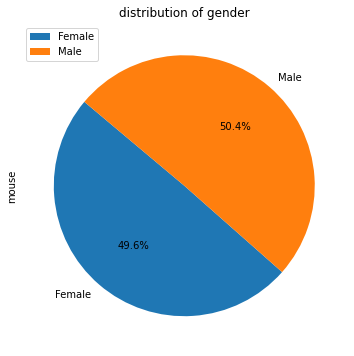

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#用pyplot方法創pie圖表顯示男的跟女的老鼠的分布  要求得跟上面一樣的圖


plt.figure(figsize = (6, 6))
plt.title('distribution of gender')  
plt.ylabel('mouse')
plt.pie(mouseSex['count'], labels = mouseSex['Sex'], autopct="%1.1f%%",startangle= 140)
plt.legend(mouseSex['Sex'], loc="upper left")
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin  算這四種藥物的最後腫瘤大小tumor volume
# Start by getting the last (greatest) timepoint for each mouse  先找出每隻老鼠timepoint的最大值(每隻老鼠最後一次受到藥物治療的時間)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint 
#合併找到的資料&原始資料(用最後一次治療時間為合併依準)


fourMedList = data[data['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]

mastimepoint = fourMedList.groupby(['Mouse ID','Drug Regimen']).max()['Timepoint'].reset_index()

mouseTumorVolume = pd.merge(mastimepoint, data, on =["Mouse ID", "Timepoint", "Drug Regimen"], how ="left")

mouseTumorVolume


,Mouse ID,Drug Regimen,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,45,Female,20,23,67.973419,2
1,a251,Infubinol,45,Female,21,25,65.525743,1
2,a275,Ceftamin,45,Female,20,28,62.999356,3
3,a411,Ramicane,45,Male,3,22,38.407618,1
4,a444,Ramicane,45,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,45,Female,6,27,68.594745,4
96,y793,Capomulin,45,Male,17,17,31.896238,2
97,y865,Ceftamin,45,Male,23,26,64.729837,3
98,z578,Ramicane,45,Male,11,16,30.638696,0


In [16]:
# Put treatments into a list for for loop (and later for plot labels) 
druglist = ['Capomulin','Ramicane','Infubinol','Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumorvol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
for x in druglist:
    y = mouseTumorVolume.loc[mouseTumorVolume['Drug Regimen'] == x , "Tumor Volume (mm3)"]
    tumorvol.append(y)
    quartiles = y.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"the lower quartile of final tumor volume is: {lowerq}")
    print(f"the upper quartile of final tumor volume is: {upperq}")
    print(f"the iqr of final tumor volume is: {iqr}")
    print(f"the median of final tumor volume is: {quartiles[0.5]}")
    print(f"value below {lower_bound} could be outliter")
    print(f"value above {upper_bound} could be outliter")

    outlier = y.loc[(y < lower_bound) | (y > upper_bound)]
    print(outlier)    
    

the lower quartile of final tumor volume is: 32.37735684
the upper quartile of final tumor volume is: 40.1592203
the iqr of final tumor volume is: 7.781863460000004
the median of final tumor volume is: 38.125164399999996
value below 20.70456164999999 could be outliter
value above 51.83201549 could be outliter
Series([], Name: Tumor Volume (mm3), dtype: float64)
the lower quartile of final tumor volume is: 31.56046955
the upper quartile of final tumor volume is: 40.65900627
the iqr of final tumor volume is: 9.098536719999998
the median of final tumor volume is: 36.56165229
value below 17.912664470000003 could be outliter
value above 54.30681135 could be outliter
Series([], Name: Tumor Volume (mm3), dtype: float64)
the lower quartile of final tumor volume is: 54.04860769
the upper quartile of final tumor volume is: 65.52574285
the iqr of final tumor volume is: 11.477135160000003
the median of final tumor volume is: 60.16518046
value below 36.83290494999999 could be outliter
value above 8

[Text(0, 0, 'Capomulin'),
 Text(0, 0, 'Ramicane'),
 Text(0, 0, 'Infubinol'),
 Text(0, 0, 'Ceftamin')]

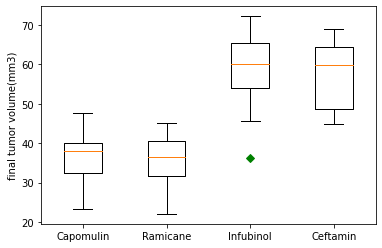

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig3, ax3 = plt.subplots()
ax3.set_ylabel('final tumor volume(mm3)')
ax3.boxplot(tumorvol, 0, 'gD')
ax3.set_xticklabels(np.repeat(druglist,1)) 


## Line and Scatter Plots

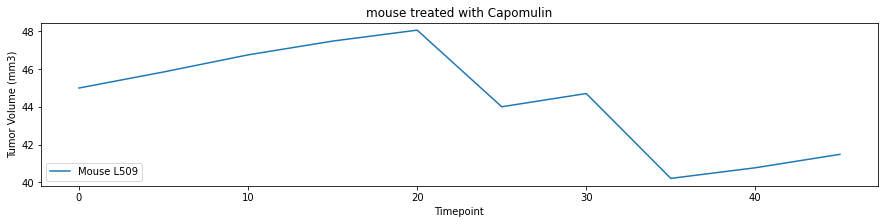

<Figure size 432x288 with 0 Axes>

In [34]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulinList = data[data['Drug Regimen'].isin(['Capomulin'])]
capomulinList.set_index('Timepoint', inplace=True)
onemouse = capomulinList.loc[capomulinList["Mouse ID"] == "l509"]

onemouse['Tumor Volume (mm3)'].plot(legend=True, kind='line', title='mouse treated with Capomulin', figsize=(15, 3))

L = plt.legend(loc="lower left")
L.get_texts()[0].set_text('Mouse L509')

plt.ylabel("Tumor Volume (mm3)")  
plt.show()
plt.tight_layout()

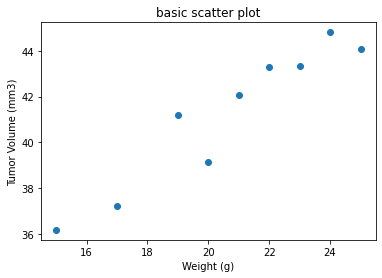

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# 體重list
weightList = sorted(set(capomulinList['Weight (g)'].unique()))
# 體重平均腫瘤大小list
avgList = np.asarray(capomulinList.groupby(['Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index(name = 'avg')['avg'])

plt.scatter(weightList, avgList) 
plt.title('basic scatter plot')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
 
plt.show()


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(weightList, avgList)
correlation 

(0.9505243961855269, 8.449451040646294e-05)